<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Escudo-UNAM-escalable.svg/683px-Escudo-UNAM-escalable.svg.png" alt="" width="200" algin = "center"/></center>
<center><img src="https://lesaunam.com/wp-content/uploads/2019/01/ENES-logo-02.png" alt="" width="200"/></center>
<center><font size="+2">Tecnologías para la Información en Ciencias</font></center>
<center><font size="+3">Introducción a la Ciencia de Datos</font></center>
<center><font size="+4">Proyecto: Web Scraping sobre la tienda de libros</font></center>
<center><font size="+2">Alumno: Juan Pablo Maldonado Castro</font></center>
<center><font size="+2">Número de cuenta: 420138620</font></center>
<center><font size="+2">Fecha de entrega: 20 de agosto de 2021</font></center>


# Introducción

El objetivo de este proyecto es realizar un proceso de Web Scraping utilizando las librerías ```BeautifulSoup``` y ```urlopen```de Python. Junto con esto, lo que se busca es poder inspeccionar adecuadamente las páginas web a partir de su código fuente (HTML) para así poder obtener y usar la información que queramos de esta misma página. Se trabajará sobre la página web http://books.toscrape.com/, a partir de la cual iremos desarrollando todas las actividades indicadas en la práctica

# Problema
El trabajo a realizar consiste en ir siguiendo las siguientes instrucciones:
1. Conoce la página: observa las tablas existentes, títulos, imágenes, valoraciones, precios, botones para añadir al cesto de compras, indicaciones de existencias o no, navegación entre páginas (número de página, total y botones "Siguiente", "Más", etc.),...

2. Observa el código fuente de la página (el código HTML) o, mejor aún, con Google Chrome da clic derecho sobre la página y selecciona "Inspeccionar". Ajusta la división entre la ventana del inspector y la página web.

3. Selecciona la herramienta que permite inspeccionar objetos y úsala en alguno (como las imágenes)

4. Con esto podrás determinar la etiqueta que contiene al objeto (y su clase/id CSS) o alguna forma de navegar el árbol XML para llegar al dato que ocupas.

5. Identifica un patrón que puedas utilizar para los URLs de cada página de las 50 totales en las que se muestran todos los libros del sitio. Esto te permitirá almacenar, iterar o visitar cada una de ellas.

6. Imprime el código fuente HTML con indentaciones para que puedas encontrar las etiquetas y atributos de los objetos que buscas.

7. Empleando BeautifulSoup en Python obten los títulos de los libros en la página actual.

8. Usando BeautifulSoup en Python obtén los precios de los libros en la página actual.

9. Obtén las valoraciones de los libros en la página actual. En este punto considera el uso de la función ```tag.attrs.items()```.

10. Obtén los URLs de las imágenes. No olvides que el atributo src de las imágenes es relativo (inicia con ../ ), por lo que hay que substituir los dos puntos por el URL base de la página (que inicia con http:// ).

11. Verifica que tengas la misma cantidad de títulos, precios, valoraciones y URLs.

12. Repite el proceso para cada página que vas a procesar. NO substituyas la información de la página anterior, la debes ir acumulando.

13. Crea un Dataframe de Pandas con TODA la información recolectada (las columnas deben ser: Título , Precio , Valoraciones y URLs ).

14. Elimina los símbolos de la moneda en la que están los precios (deja sólo números con punto decimal).

15. Ordena el dataframe inplace de acuerdo a la columna Precio en orden descendente.

16. Si las valoraciones las tienes como cadena de texto cámbialas a valores numéricos equivalentes ('1' 1, '2' 2, '3' 3, '4' 4 y '5' 5).

17. Verifica los tipos de datos de cada columna.

18. Convierte al tipo correcto la(s) columna(s) que no lo tengan.

19. ¿Existe correlación entre los precios y las valoraciones de los libros?

20. Muéstralo de forma gráfica (tú eliges la gráfica que mejor lo represente, en tu opinión).

# Desarrollo

Antes de comenzar a seguir las instrucciones solicitadas en el problema, hay que importar las librerías de ```BeautifulSoup```,```urlopen```, ```matplotlib``` y ```pandas``` que vamos a ocupar más adelante.

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

## 1, 2, 3 y 4. Conociendo la página y su código fuente (HTML)

Lo primero que hacemos es entrar a la página de http://books.toscrape.com/ en el navegador web. Esto es lo primero que vemos:

<img src="p1.png" >

Al ir navegando por la página principal, a primera vista, podemos observar que dentro de ella encontramos lo siguiente:
* el título principal de la página,
* una lista de las distintas categorías de libros que permiten filtrar el catálogo,
* una sección central donde podemos ver un catálogo de libros. Este catálogo de libros en la página principal contiene:
    * Portada del libro (imagen)
    * Calificación del libro
    * Título del libro
    * Precio
    * Estado de disponibilidad (stock)
    * Botón para añadir a carrito
    * Un hipervínculo (en la imagen y título) que permite ir a otra página del sitio web, en esta se muestra información más detallada del producto.
    
* el catálogo de libros que aparece solo muestra 20 de 1000 resultados.
* los otros 980 resultados se encuentran en otras páginas, fácilmente accesibles por medio de un botón ```next``` que está hasta abajo en la página.

Teniendo esto en consideración, también podemos inspeccionar la página y sus elementos viendo la estructura de su código HTML. Esto se ve de la siguiente manera:

<img src="p2.png">

La parte del código fuente que nos interesa observar es la que contiene todos los elementos que podemos ver directamente en la página central. Notamos que todos ellos son hijos de la etiqueta definida como ```<body id="default" class="default">...</body>```, siendo así esta la sección que vamos a estar utilizando para obtener información de las páginas.

A parte de esto, lo que vamos a ocupar para puntos posteriores es la siguiente información de los libros que hay en el catálogo:
* Título
* Precio
* Valoraciones
* URL de imagen

Podemos identificar de una vez con la herramienta de inspección cómo y dónde están están escritos en el código fuente de la página. Para ello, nos enfocamos en seleccionar uno de las celdas que contenga información de alguno de los libros y vemos lo siguiente en pantalla:

<img src="p3.png">

Notamos que cada sección de información de libro es un elemento hijo, ```li``` ,de una lista ordenada ```ol```. En este caso, todos tienen unas clases que pertenecen al estilo en columnas que ofrece una de las hojas de estilo en cascada (probablemente la de Bootstrap) definida como: ```<li class="col-xs-6 col-sm-4 col-md-3 col-lg-3">...</li>```.

Solo saber esto no nos sirve para encontrar directamente los datos que buscamos en el código fuente. Así que nos metemos a inspeccionar dentro de estas etiquetas de ```<li>``` y ahí mismo podemos encontrar cómo están definidos todos los elementos que las conforman. Usando la herramienta para inspeccionar elementos y su código fuente observamos lo siguiente:

<img src="p4.png">

Por lo que se ve en la imagen, algo notable es que los datos de cada libro mostrado en la página principal son descendientes de una etiqueta ```<article>```. En este caso todos los libros en esta página principal tienen la misma clase asignada a esta etiqueta, que es: ```<article class="product_pod">```. Si ponemos como raíz a ```article.product_pod``` y vemos en estructura de árbol toda su herencia, nos queda:
* ```article.product_pod```
    * ```div.image_container```
        * ```a```
            * ```img.thumbnail``` $\leftarrow$ (El atributo 'src' de ésta contiene la URL de imagen)
    * ```p.star-rating``` $\leftarrow$ (La segunda clase de esta etiqueta contiene la valoración asignada al libro)
        * ```i```
    * ```h3```
        * ```a``` $\leftarrow$ (Ésta contiene en su atributo 'title' el título del libro)
    * ```div.product_price```
        * ```p.price_color``` $\leftarrow$ (contiene el precio del libro)
        * ... otros elementos relacionados a disponibilidad (stock) y botón de añadir al carrito ...
        
Viendo esto, ya sabemos dónde ubicar los datos que buscamos de cada libro. Para:
* **Título del libro**: Obtenemos el valor del atributo *title* de ```a``` que es hijo de ```h3```, el cual es hijo de ```article.product_pod```.
* **Precio**: Lo buscamos sabiendo que están en una etiqueta definida como ```p.price_color```.
* **Valoraciones**: La obtenemos sacando el valor de la segunda clase que hay en ```p.star_rating```.
* **URL de imagen**: Obtenemos el atributo *src* de la etiqueta definida como ```img.thumbnail```.

Por si acaso, hay que asegurarnos de que las etiquetas y clases que se vayan a usar como referencia sean únicas para los datos que se quieren extraer. A lo que me refiero con esto es que queremos evitar conseguir algún dato erróneo o adicional que también haya coincidido en clase y etiqueta con algún otro que se estaba buscando. Por ejemplo, si encotramos que todos los datos que ocupamos están en un ```p.class1```, pero no nos fijamos bien en el resto del código HTML puede que hubiera información ajena a la buscada que compartiera esta misma clase sin que nos diéramos cuenta.

Para evitar casos de este estilo nos podemos meter al código fuente de la página y fijarnos en el número de coincidencias que hay en la herramienta de búsqueda para cierta clase y etiqueta. Si hay exactamente 20 (el número de libros por página), entonces significa que esas 20 etiquetas estaban asignadas cada una a un libro y que no hay ningún otro elemento que las posea. De esta manera evitamos posibles conflictos con información que estuviera en secciones del mismo estilo, pero que no son lo que buscamos.

Esto lo realizamos con cada una de las etiquetas que identificamos para el título, el precio, la valoración y la URL de imagen. Abajo hay una captura de pantalla realizando este proceso con el caso de ```p.price_color```.

<img src="price.png">

Aplicando esto a todas las etiquetas obtuvimos que estas etiquetas y clases sí son únicas para los elementos de los libros. Entonces podemos seguir usándolas para identificar los elementos que ocupamos del código HTML.

Ya estamos lo suficientemente familiarizados con la estructura de la página y además sabemos en dónde encontrar los datos que queremos. Con esto, avanzamos a los siguientes puntos.

## 5. Identificar patrón en URLs de cada página.

Para esto revisamos qué pasa con las URLs si navegamos por medio de las distintas páginas del catálogo. Empezando con la página 1 tenemos lo siguiente:

<img src="url1.png">

Avanzando a la segunda página del catálogo aparece esto:

<img src="url2.png">

Y como último caso prueba, en la tercer página del catálogo tenemos:

<img src="url3.png">

Como vemos, todas estas empiezan con http://books.toscrape.com/catalogue/. Luego de esto, la página 1 termina en ```page-1.html```, la página 2 en ```page-2.html``` y la tercera en ```page-3.html```. Claramente podemos observar un patrón aquí, donde tendremos para una página **n** (donde **n** es un número entero entre 1 y 50) la terminación de ```page-n.html```. Asumiremos que esto se cumple en todas las páginas, incluso se probó en el extremo de ```page-50.html``` y sí sirvió como era de esperarse. Además estamos seguros de que ya no hay nada más allá de la página del catálogo 50, porque si intentamos meter algo como ```page-51.html``` terminará mandándonos un error de página no encontrada.

Nada más por si acaso, verificamos que la estructura del código HTML de las páginas de catálogo no se hayan modificado significativamente en comparación al de la página inicial http://books.toscrape.com/. Esto con el fin de estar seguros de que vayamos a estar buscando correctamente los datos acorde a cómo los vimos en los incisos anteriores. Metiéndonos a http://books.toscrape.com/catalogue/page-50.html como apoyo, vemos la estructura del código para la sección del catálogo:

<img src="p5.png">

Como podemos ver por la imagen, tenemos exactamente la misma estructura de código HTML que habíamos analizado en la página inicial durante los primeros incisos. Por ende, vamos a seguir buscando en todas las 50 páginas con formato http://books.toscrape.com/catalogue/page-N.html (donde N corresponde a un número entero entre 1 y 50) los datos que ocupamos con base en las características que encontramos anteriormente.

## 6. Imprime el código fuente HTML

Imprimiendo el código fuente HTML con indentaciones podemos observar las etiquetas con las características ya mencionadas que nos permitirán obtener los datos de título, precio, URL de imagen y valoración. En este caso, solo imprimiremos el código de la página inicial del catálogo como demostración.

In [2]:
html = urlopen('http://books.toscrape.com/')
bs = BeautifulSoup(html.read(), 'html.parser')

print(bs.prettify(formatter='html'))

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

Podemos observar que al imprimir aquí el código HTML seguimos viendo exactamente las mismas etiquetas, clases y atributos que mencionamos en los primeros 4 incisos de esta actividad. En resumen, todos los libros se encuentran encapsulados en una lista ordenada, ```ol.row```, donde cada elemento, ```li```, con clases de varias columnas y un hijo ```article.product_pod``` contiene toda la información que buscamos en un libro. Ya para saber particularmente dónde buscamos el título, el puntaje, el precio, etc., la explicación está más detallada al final de la sección **1, 2, 3 y 4. Conociendo la página y su código fuente (HTML)**.

## 7. Obten los títulos de los libros en la página actual

Recordemos dónde estaban los títulos de los libros:
* ```article.product_pod```
    * ```h3```
        * ```a:title```

Basándonos en esto, lo que vamos a hacer primero es encontrar todas las etiquetas de ```article.product_pod```. Después de eso, iterando sobre todas las coincidencias obtenidas, sacamos el ```h3``` contenido en cada una. Dentro del ```h3``` obtenemos la etiqueta ```a```. En una lista de títulos vamos añadiendo el atributo de ```title``` de la ```a``` encontrada por cada iteración. Al final de todo este proceso deberíamos tener nuestra lista de títulos de la página inicial

Esto se puede lograr de la siguiente manera:

In [3]:
html = urlopen('http://books.toscrape.com/')
bs = BeautifulSoup(html.read(), 'html.parser')

productList = bs.find_all('article', {'class': 'product_pod'})
titleList = []

for product in productList:
    a = product.h3.a
    titleList.append(a['title'])

Imprimiendo los títulos, nos queda:

In [4]:
print("Títulos de los libros de la página inical:\n")
for title in titleList:
    print(title)

Títulos de los libros de la página inical:

A Light in the Attic
Tipping the Velvet
Soumission
Sharp Objects
Sapiens: A Brief History of Humankind
The Requiem Red
The Dirty Little Secrets of Getting Your Dream Job
The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
The Black Maria
Starving Hearts (Triangular Trade Trilogy, #1)
Shakespeare's Sonnets
Set Me Free
Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)
Rip it Up and Start Again
Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991
Olio
Mesaerion: The Best Science Fiction Stories 1800-1849
Libertarianism for Beginners
It's Only the Himalayas


## 8. Obten los precios de los libros en la página actual

Recordemos dónde se encuentran los precios de los libros:
* ```p.price_color```

Lo que haremos es iterar sobre cada uno de los elementos que se obtuvieron en esta etiqueta y metemos en una lista de precios el valor del texto, en este caso el precio, que contiene la etiqueta ```p``` encontrada.

In [5]:
html = urlopen('http://books.toscrape.com/')
bs = BeautifulSoup(html.read(), 'html.parser')

priceSearch = bs.find_all('p', {'class':'price_color'})
priceList = []

for price in priceSearch:
    priceList.append(price.get_text())

Imprimiendo esta lista de precios nos queda:

In [6]:
print("Precios de los libros de la página inicial:\n")
for price in priceList:
    print(price)

Precios de los libros de la página inicial:

£51.77
£53.74
£50.10
£47.82
£54.23
£22.65
£33.34
£17.93
£22.60
£52.15
£13.99
£20.66
£17.46
£52.29
£35.02
£57.25
£23.88
£37.59
£51.33
£45.17


## 9. Obten las valoraciones de los libros en la página actual

Recordemos que las valoraciones de los libros se encuentran como segunda clase en:
```p.star-rating```

Las valoraciones están escritas como 'One', 'Two', 'Three', 'Four' y 'Five'.

En este caso, como tenemos dos clases en la misma etiqueta y una de ellas es la que buscamos, es conveniente ver la forma del diccionario de atributos que podemos obtener a partir de las etiquetas de ```p.star-rating```. La razón de esto es para determinar cómo obtendremos exactamente la palabra que represente la valoración a partir del *tag*.  Esto lo hacemos checando un solo caso y obteniendo su diccionario ```tag.attrs```.

In [7]:
html = urlopen('http://books.toscrape.com/')
bs = BeautifulSoup(html.read(), 'html.parser')
t = bs.find('p', {'class': 'star-rating'})

print(t.attrs)

{'class': ['star-rating', 'Three']}


Como vemos, lo que nos regresa es un diccionario con la llave ```class``` y su valor es una lista. La lista en el índice 0 contiene la clase que ya conocemos ```star-rating``` y en el índice 1 contiene la valoración asignado al libro. Ahora que identificamos que ocupamos el segundo elemento de la lista, la cual es un valor de la llave ```class``` en un diccionario, obtenemos directamente el valor del puntaje para todos los tags que encontremos cuya etiqueta sea ```p.star-rating```. Esto lo hacemos de la siguiente manera, añadiendo los valores a una lista de valoracines:

In [8]:
html = urlopen('http://books.toscrape.com/')
bs = BeautifulSoup(html.read(), 'html.parser')

t = bs.find_all('p', {'class': 'star-rating'})
scoreList = []

for p in t:
    for class_, rating in p.attrs.items():
        scoreList.append(rating[1])

Imprimiendo las valoraciones obtenidas tenemos:

In [9]:
print("Valoraciones de los libros de la página inicial:\n")
for score in scoreList:
    print(score)

Valoraciones de los libros de la página inicial:

Three
One
One
Four
Five
One
Four
Three
Four
One
Two
Four
Five
Five
Five
Three
One
One
Two
Two


## 10. Obten los URLs de las imágenes en la página actual

Recordemos dónde se encontraban los URLs de las imágenes:
```img.thumbnail```

Para obtener la URL, simplemente obtenemos el atributo *src* de cualquier etiqueta que coincida con ```img.thumbnail```. Considerando que en este caso, dentro del código las URL se definen con un formato como este: ```/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg```. Entonces, tenemos que añadirle el URL base de la página a esto para que se vuelva un link válido por fuera del sitio. Es decir: 

http://books.toscrape.com/ + media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg

Realizamos este proceso para cada imagen que nos vayamos encontrando y añadimos el URL a una lista de URLs de imagen.

In [10]:
html = urlopen('http://books.toscrape.com/')
bs = BeautifulSoup(html.read(), 'html.parser')

imageURLSearch = bs.find_all('img', {'class': 'thumbnail'})
imageURLList = []

for image in imageURLSearch:
    imageURLList.append("http://books.toscrape.com/" + image['src'])
    

Ya que generamos nuestra lista de URLs, imprimimos sus elementos:

In [11]:
print("URLs de las imágenes de los libros de la página inicial:\n")
for image in imageURLList:
    print(image)

URLs de las imágenes de los libros de la página inicial:

http://books.toscrape.com/media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg
http://books.toscrape.com/media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg
http://books.toscrape.com/media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg
http://books.toscrape.com/media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg
http://books.toscrape.com/media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg
http://books.toscrape.com/media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg
http://books.toscrape.com/media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg
http://books.toscrape.com/media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg
http://books.toscrape.com/media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg
http://books.toscrape.com/media/cache/58/46/5846057e28022268153beff6d352b06c.jpg
http://books.toscrape.com/media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg
http://books.toscrape.com/media/cache/10/48/1048f63

## 11. Verifica que tengas la misma cantidad de títulos, precios, valoraciones y URLs

Para esto, simplemente volvemos a llamar las 4 listas que ya definimos y contamos su número de elementos:

In [12]:
print("Número de elementos en")
print(f"titleList: {len(titleList)}")
print(f"priceList: {len(priceList)}")
print(f"scoreList: {len(scoreList)}")
print(f"imageURLList: {len(imageURLList)}")


Número de elementos en
titleList: 20
priceList: 20
scoreList: 20
imageURLList: 20


Como podemos observar, está verificado que tenemos exactamente 20 elementos en cada una de las listas. Cada elemento corresponde a un libro de la página inicial.

## 12. Repite el proceso para cada página que vas a procesar (acumulando la información)

Lo que haremos, es hacer exactamente los mismos procesos que antes, pero repetiremos todo en un ciclo 50 veces y guardando todo lo que obtengamos en una sola lista por tipo de dato (precio, valoración, título y URL). Para ir cambiando de URL de catálogo nos apoyamos en el patrón obtenido en **5. Identificar patrón en URLs de cada página**. En este caso, los pasos a seguir dentro del ciclo serán:

1. Obtener el link de la página de la que queremos extraer información apoyándonos en el patrón que siguen los links de las páginas de los catálogos. Esto se hará del 1 al 50.

2. Conseguir el código HTML con ```urlopen```.

3. Con BeautifulSoup obtener:
    1. Título
    2. Precio
    3. Valoración
    4. URL de imagen
    
   Cada valor se añade a su respectiva lista (de manera acumulativa)

**Aspecto a considerar**:

Lo único que diferirá de cómo extraemos la información será en las URLs de las imágenes. Esto se debe a que en la página inicial, http://books.toscrape.com/, las imágenes tienen *src* de la siguiente forma: 

```src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"``` 

Por otro lado, las páginas que tienen una forma como la de ```http://books.toscrape.com/catalogue/page-1.html```, referencian sus imágenes con ```../``` al inicio, es decir:

```src="../media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"```

Entonces como solución solo cortamos los primeros 3 elementos de la **string**, ```../```, que pertenezcan al URL de la imagen y lo seguimos anexando a http://books.toscrape.com/.


In [13]:
titleL = [] 
priceL=[]
scoreL=[]
imageL = []

for n in range(1,51):
    link = f"http://books.toscrape.com/catalogue/page-{n}.html"
    
    html = urlopen(link)
    bs = BeautifulSoup(html.read(), 'html.parser')
    
    #Títulos
    productList = bs.find_all('article', {'class': 'product_pod'})
    for product in productList:
        a = product.h3.a
        titleL.append(a['title'])
    
    #Precios
    priceSearch = bs.find_all('p', {'class':'price_color'})
    for price in priceSearch:
        priceL.append(price.get_text())
    
    #Valoraciones
    t = bs.find_all('p', {'class': 'star-rating'})
    for p in t:
        for class_, rating in p.attrs.items():
            scoreL.append(rating[1])
    
    #URL de imagen
    imageURLSearch = bs.find_all('img', {'class': 'thumbnail'})
    for image in imageURLSearch:
        imageL.append("http://books.toscrape.com/" + image['src'][3::])
    

Una vez creadas nuestras listas, verificamos que sí se hayan guardado un total de 1000 datos en cada una (es el número total de libros que hay en la página).

In [14]:
print("Número de elementos en")
print(f"titleL: {len(titleL)}")
print(f"priceL: {len(priceL)}")
print(f"scoreL: {len(scoreL)}")
print(f"imageL: {len(imageL)}")

Número de elementos en
titleL: 1000
priceL: 1000
scoreL: 1000
imageL: 1000


Verificamos una vez más que el número de elementos de todas las listas sí es el mismo, en este caso 1000. Esto significa que sí obtuvimos toda la información que ocupamos de los 1000 libros que hay en la página de: http://books.toscrape.com/.

## 13. Crea un dataframe con TODA la información recolectada

Creamos un dataframe usando las listas que creamos en el inciso anterior como columnas. En este caso, como todas las listas están ordenadas acorde al orden en que los libros estaban acomodados en la página, no es necesario preocuparse por reacomodar las listas tal que la información esté alineada correctamente en las filas. Cada fila sí tiene alineados los valores de un mismo libro por el orden en que aparecen en el código fuente.

In [15]:
df = pd.DataFrame({'Título': titleL, 'Precio': priceL, 'Valoraciones': scoreL, 'URLs':imageL})

df

,Título,Precio,Valoraciones,URLs
0,A Light in the Attic,£51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
1,Tipping the Velvet,£53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
2,Soumission,£50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,£47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
4,Sapiens: A Brief History of Humankind,£54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,£55.53,One,http://books.toscrape.com/media/cache/96/ee/96...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",£57.06,Four,http://books.toscrape.com/media/cache/09/7c/09...
997,A Spy's Devotion (The Regency Spies of London #1),£16.97,Five,http://books.toscrape.com/media/cache/1b/5f/1b...
998,1st to Die (Women's Murder Club #1),£53.98,One,http://books.toscrape.com/media/cache/2b/41/2b...


## 14. Elimina los símbolos de la moneda en la columna de Precio

Primero veamos el tipo de datos que tenemos en la columna **Precio**. Esto lo hacemos con ```dtype```.

In [16]:
df['Precio'].dtype

dtype('O')

La columna Precio está conformada por valores de tipo ```object```, esto quiere decir que tenemos únicamente valores de texto (**strings**) o sino valores de texto mezclados con valores numéricos en nuestra columna. En este caso, estamos seguros que nuestros valores son **strings** por una razón: el símbolo. Como el símbolo de £ no es un valor numérico y éste está presente en todos los datos, entonces todos estos serán **strings** a pesar de que no se muestre explícitamente con ```dtype```.

Considerando lo anterior, manipularemos la **string** cortando el primer elemento de ésta (siendo el símbolo de moneda que tienen). Finalmente convertimos lo obtenido en un valor de tipo **float** y aplicamos el cambio a la columna de **Precio** en el dataframe.

In [17]:
def slicer(s):
    return float(s[1::])

df['Precio'] = df['Precio'].apply(slicer)
df

,Título,Precio,Valoraciones,URLs
0,A Light in the Attic,51.77,Three,http://books.toscrape.com/media/cache/2c/da/2c...
1,Tipping the Velvet,53.74,One,http://books.toscrape.com/media/cache/26/0c/26...
2,Soumission,50.10,One,http://books.toscrape.com/media/cache/3e/ef/3e...
3,Sharp Objects,47.82,Four,http://books.toscrape.com/media/cache/32/51/32...
4,Sapiens: A Brief History of Humankind,54.23,Five,http://books.toscrape.com/media/cache/be/a5/be...
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,55.53,One,http://books.toscrape.com/media/cache/96/ee/96...
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four,http://books.toscrape.com/media/cache/09/7c/09...
997,A Spy's Devotion (The Regency Spies of London #1),16.97,Five,http://books.toscrape.com/media/cache/1b/5f/1b...
998,1st to Die (Women's Murder Club #1),53.98,One,http://books.toscrape.com/media/cache/2b/41/2b...


## 15. Ordena el dataframe inplace de acuerdo a la columna Precio en orden descendente.

Para esto simplemente invocamos a la función de ```sort_values```, la cual nos permitirá ordenar las filas acorde a cierto valor. Esto lo aplicamos al dataframe indicando que se base en el valor numérico de la columna **Precio**. Hay que asegurarnos de indicar ```ascending=False```para que el orden sea descendente y de usar ```inplace=True``` para que se guarden los cambios de la operación en el *dataframe*.

In [18]:
df.sort_values(by='Precio', inplace=True, ascending = False)
df

,Título,Precio,Valoraciones,URLs
648,The Perfect Play (Play by Play #1),59.99,Three,http://books.toscrape.com/media/cache/40/16/40...
617,Last One Home (New Beginnings #1),59.98,Three,http://books.toscrape.com/media/cache/e4/0a/e4...
860,Civilization and Its Discontents,59.95,Two,http://books.toscrape.com/media/cache/4d/a6/4d...
560,The Barefoot Contessa Cookbook,59.92,Five,http://books.toscrape.com/media/cache/dd/07/dd...
366,The Diary of a Young Girl,59.90,Three,http://books.toscrape.com/media/cache/83/d5/83...
...,...,...,...,...
302,Greek Mythic History,10.23,Five,http://books.toscrape.com/media/cache/36/cf/36...
84,Patience,10.16,Three,http://books.toscrape.com/media/cache/01/72/01...
716,The Tipping Point: How Little Things Can Make ...,10.02,Two,http://books.toscrape.com/media/cache/27/3d/27...
501,The Origin of Species,10.01,Four,http://books.toscrape.com/media/cache/da/0d/da...


## 16. Cambia las valoraciones a valores numéricos equivalentes

En este caso, las valoraciones que tenemos no están en forma numérica. Lo que tenemos son 5 tipos distintos de **strings** que representan un valor entre 1 y 5. Siendo 1 la valoración más baja y 5 la más alta. En este caso, los valores numéricos de éstas se relacionan de la siguiente forma:

* One = 1
* Two = 2
* Three = 3
* Four = 4
* Five = 5

Considerando esto, aplicamos una función que cambie el valor de la **string** por su equivalente numérico en un dato de tipo **Integer** y se la aplicamos a la columna de **Valoraciones** en el dataframe.

In [19]:
def scoreTextToInt(s):
    values = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5}
    return values[s]

df['Valoraciones'] = df['Valoraciones'].apply(scoreTextToInt)
df

,Título,Precio,Valoraciones,URLs
648,The Perfect Play (Play by Play #1),59.99,3,http://books.toscrape.com/media/cache/40/16/40...
617,Last One Home (New Beginnings #1),59.98,3,http://books.toscrape.com/media/cache/e4/0a/e4...
860,Civilization and Its Discontents,59.95,2,http://books.toscrape.com/media/cache/4d/a6/4d...
560,The Barefoot Contessa Cookbook,59.92,5,http://books.toscrape.com/media/cache/dd/07/dd...
366,The Diary of a Young Girl,59.90,3,http://books.toscrape.com/media/cache/83/d5/83...
...,...,...,...,...
302,Greek Mythic History,10.23,5,http://books.toscrape.com/media/cache/36/cf/36...
84,Patience,10.16,3,http://books.toscrape.com/media/cache/01/72/01...
716,The Tipping Point: How Little Things Can Make ...,10.02,2,http://books.toscrape.com/media/cache/27/3d/27...
501,The Origin of Species,10.01,4,http://books.toscrape.com/media/cache/da/0d/da...


## 17. Verifica los tipos de datos de cada columna 

Los tipos de datos que queremos tener para cada columna son los siguientes:
* **Título**: ```string```
* **Precio**: ```float```
* **Valoraciones**: ```int```
* **URLs**: ```string```

Las columnas de **Valoraciones** y **Precio** tienen el tipo de datos que queremos. Esto es gracias a las modificaciones que les hicimos en los pasos **14** y **16**.

En el caso de los tipos de dato **string** para **Título** y **URLs**, no es realmente tan necesario que sean de este tipo. La razón de esto, es que para fines de este proyecto no vamos a estar manipulando o interactuando con los títulos o URLs de imágenes que obtuvimos más allá de lo que ya hicimos. Además, ya sabemos que todos los valores de las URLs fueron creados a partir de **strings** y no habrá problema. Lo malo, es que en la situación de algún título sí pueden existir libros que tienen un número como título (como *1984*). En este último escenario sí podrían mezclarse valores que se asuman como numéricos y **strings** en una columna.

Pero, con fines de demostración, considero buena idea convertirlos porque este mismo tipo de problemas se pueden encontrar en otros proyectos. En algunos de estos, sí llega a ser necesario interactuar con los datos obtenidos a manera de **string**.

Para verificar el tipo de datos que tenemos en cada columna, utilizamos la función de ```dtypes```. Al aplicarla al dataframe nos devolverá una serie de pandas con el tipo de dato de cada columna. Esto se hace de la siguiente manera:

In [20]:
df.dtypes

Título           object
Precio          float64
Valoraciones      int64
URLs             object
dtype: object

Como estamos viendo, el tipo de datos de **Precio** y de **Valoraciones** es el que deseamos. En cambio, en **URLs** y **Título** tenemos el tipo de dato ```object```, lo cual no es exactamente el que buscábamos en ambos. Esto se debe a que, como ya mencionamos, ```object``` implica que hay uno de dos casos: todos los valores son **strings** o hay **strings** y además valores numéricos en la columna. En el siguiente punto nos enfocamos a cambiar ambos datos de tipo ```object``` a ```string```.

## 18. Convierte al tipo correcto de datos en las columnas necesarias

Para esto, simplemente redefinimos nuestras columnas como versiones de ellas que tengan declarado explícitamente que el tipo de  datos en ellas es **string**. Esto lo hacemos redefiniendo nuestras columnas como series a las cuales les declaramos explícitamente ```dtype="string"``` como se muestra a continuación:

In [21]:
df['Título'] = pd.Series(df['Título'], dtype="string")
df['URLs'] = pd.Series(df['URLs'], dtype="string")
df

,Título,Precio,Valoraciones,URLs
648,The Perfect Play (Play by Play #1),59.99,3,http://books.toscrape.com/media/cache/40/16/40...
617,Last One Home (New Beginnings #1),59.98,3,http://books.toscrape.com/media/cache/e4/0a/e4...
860,Civilization and Its Discontents,59.95,2,http://books.toscrape.com/media/cache/4d/a6/4d...
560,The Barefoot Contessa Cookbook,59.92,5,http://books.toscrape.com/media/cache/dd/07/dd...
366,The Diary of a Young Girl,59.90,3,http://books.toscrape.com/media/cache/83/d5/83...
...,...,...,...,...
302,Greek Mythic History,10.23,5,http://books.toscrape.com/media/cache/36/cf/36...
84,Patience,10.16,3,http://books.toscrape.com/media/cache/01/72/01...
716,The Tipping Point: How Little Things Can Make ...,10.02,2,http://books.toscrape.com/media/cache/27/3d/27...
501,The Origin of Species,10.01,4,http://books.toscrape.com/media/cache/da/0d/da...


Una vez hecho esto, verificamos si ahora sí tenemos el tipo de datos deseados en todas las columnas. Haciéndolo de la misma forma que en el inciso anterior, tenemos:

In [22]:
df.dtypes

Título           string
Precio          float64
Valoraciones      int64
URLs             string
dtype: object

Ahora sí tenemos el tipo de dato deseado en cada columna.

## 19. ¿Existe correlación entre los precios y las valoraciones de los libros?

Una forma de observar la correlación entre dos variables, como en este caso lo son **Precio** y **Valoraciones** es por medio del coeficiente de correlación de Pearson. Este se define como:

$$
r = \frac{\sum(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum (x_i-\bar{x})^2(y_i-\bar{y})^2}}
$$

Donde:
* $x$ y $y$ son las variables cuya correlación estamos observando.
* $\bar{x}$ y $\bar{y}$ son las medias de $x$ y $y$ respectivamente

Esto devolverá un valor en el intervalo $[-1,1]$, donde los valores más cercanos a $+1$ o $-1$ indicarán que hay una fuerte correlación entre las dos variables y aquellos más cercanos a 0 implican que la correlación es muy débil o inexistente. Si tenemos un valor como $-0.9$, esto significaría que hay una fuerte correlación negativa entre $x$ y $y$ (a medida que $x$ crece, $y$ decrece). Si tuviéramos algo como $0.85$ el valor tendríamos una correlación positiva fuerte entre $x$ y $y$ (a medida que $x$ crece $y$ también). Como último ejemplo, si el coeficiente nos devolviera algo como $0.1$, esto implicaría que hay una correlación extremadamente baja o inexistente entre $x$ y $y$  (el valor de $x$ no influencia significativamenteo de ninguna manera al de $y$).

Pasando a nuestros datos, definamos a $x$ como los datos de la columna **Precio** y a $y$ como los de la columna **Valoraciones**. Algo bueno de pandas, es que su librería incluye una función de correlación entre dos o más columnas de datos. Si aplicamos ```corr``` a la columna **Precio** y de **Valoraciones**, obtendremos el coeficiente de corelación de Pearson directamente como se muestra a continuación.

In [26]:
print(f"r = {df['Precio'].corr(df['Valoraciones'])}")

r = 0.028166239485872994


Podemos observar que tenemos un coeficiente de correlación de Pearson de $r = 0.0281...$. Esto es un valor extremadamente bajo para la correlación, ya que es muy cercano a 0. Por esta misma razón podemos asumir que la correlación entre las valoraciones de los libros y sus precios es prácticamente inexistente para nuestro conjunto de datos. Significando que el valor del precio no influye en la valoración, ni el de la valoración en el precio.

**Respuesta corta**: La correlación no existe acorde a nuestro valor de $r$.

## 20. Muéstralo de forma gráfica

Para mostrar esto de forma gráfica basta con hacer un diagrama de dispersión. En este caso pondremos la variable de **Precio** en el eje de las $x$ y la de **Valoraciones** en el de las $y$. 

La manera gráfica en que podemos identificar correlación entre dos variables depende de la forma que van tomando los puntos en el diagrama de dispersión. En casos de correlación positiva, los datos van a ir asemejándose a la forma de una línea recta con pendiente positiva. Cuando haya correlación negativa, los datos tomarán forma de una línea recta con pendiente negativa. Finalmente, si no hay correlación entre las dos variables, los datos no asemejarán la forma de una línea, sino que estarán esparcidos por todos lados del diagrama y no habría forma de encontrar una correlación. En este último caso no seríamos capaces de identificar si los valores de una variable crecen o decrecen dependiendo del comportamiento de la otra.

Representando nuestro conjunto de las variables **Precio** y **Valoraciones**, como nuestra correlación es inexistente, deberíamos observar que los puntos no estarán siguiendo ninguna forma por donde podamos trazar una línea que se asemeje. Lo que aparecerá probablemente es que en cada puntaje de valoración encontraremos muchos libros distribuidos en el rango de todos los precios que hay, sin que haya una zona más cargada que otra. Al final todos los puntajes tendrán una distribución muy similar a la uniforme en los valores de los precios.

Esto lo podemos visualizar con ```matplotlib``` haciendo el siguiente diagrama de dispersión:

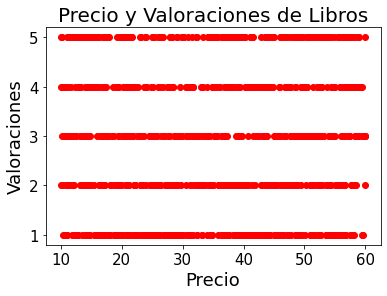

In [24]:
plt.title('Precio y Valoraciones de Libros', fontsize=20)
plt.scatter(df['Precio'], df['Valoraciones'], color = 'red')
plt.xlabel('Precio', fontsize = 18)
plt.ylabel('Valoraciones', fontsize = 18)
plt.yticks([1,2,3,4,5])
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

Como vemos, se muestra que no hay ninguna correlación entre el precio y la valoración de un libro. En este caso, sin importar la valoración, los libros tienen precios esparcidos por todo el dominio de precios que tenemos. Es justo lo que planteamos antes de mostrar la gráfica.

En conclusión, en todas las valoraciones hay libros de todos los precios distribuidos prácticamente de manera uniforme entre los precios de 10 y 60. Gráficamente, esto nos demuestra que definitivamente no existe una correlación entre los datos de **Precio** y **Valoraciones**. El valor del precio no afecta las valoraciones y tampoco los puntajes de las valoraciones afectan el precio de un libro.

# Conclusiones y comentarios

Tras ir siguiendo todos los pasos e instrucciones de este proyecto aprendí a utilizar distintas herramientas y métodos que crontribuyen al *Web Scraping*. En mi opinión, una de las habilidades más relevantes que pude empezar a desarrollar en este proyecto fue la primera inspección de la página y su código fuente. Este proceso inicial, a pesar de ser "sencillo", es la base sobre la que se va a estar apoyando todo el proyecto.

El primer análisis de la página que se obtiene al interactuar con ella directamente y con su código fuente es de gran utilidad para poder tomar decisiones en cómo se va a realizar el *Web Scraping* de ésta. Por ejemplo, la forma en que se pudo encontrar una manera de obtener los datos de las 50 páginas de catálogo que había en la página fue interactuando y navegando por las distintas secciones. Esto resultó en que se haya podido encontrar un patrón sobre el cual se iteró para poder abrir el código HTML de todas ellas sin mayor problema.

Siguiendo con esto, otro resultado muy importante derivado de este análisis fue la obtención de las etiquetas con sus respectivas clases que contenían los datos que buscábamos. Antes de comenzar a crear el programa para hacer *Web Scraping*, hay que identificar qué es lo que vamos a estar buscando, dónde lo encontraremos y cómo lo obtendremos. En este caso, lo que resultó de gran utilidad fue el uso de la herramienta de inspección de elementos de la página web. Con ésta rápidamente pude encontrar dónde se ubicaban todos los datos que quería, y una vez que los tuve identificados, ya no tuve que andar revisando constantemente todo el código HTML de nuevo para saber qué hacer para buscar la información.

Cambiando al tema de ```BeautifulSoup```, creo que ésta es una herramienta fácil de implementar para lo que se ocupó, pero muy útil en Python para realizar el proyecto. Cada paso que requería de la obtención de información consistía en hacer casi lo mismo. Lo cual simplemente era abrir el HTML con ```urlopen``` y seguir con una búsqueda auxiliada por ```BeautifulSoup``` donde se consideraba lo que encontrábamos y ocupábamos del código HTML en los primeros pasos. Siguiendo este proceso, se podría encontrar cualquier tipo de elemento que queramos dentro de la página y obtenerlo en Python (siempre y cuando siguiera un orden o patrón reconocible en el código fuente).

El aspecto adicional de utilizar ```pandas``` en este proyecto es algo que considero ayuda bien a visualizar la información y manipularla. Esto es bueno, ya que cuando empezamos a conseguir datos de alguna página no los queremos tener ahí solo para verlos en Python, lo interesante es manipularlos y hacer observaciones de ellos una vez que los obtuvimos. Durante este proyecto lo que se ocupó para realizar acciones de este tipo fue acomodar todo en un *dataframe* y hacer ciertas manipulaciones en los datos que se habían extraído de la página web. Esto implicaba eliminar ciertos caracteres y realizar transformaciones en el tipo de dato de cada columna que ocupáramos.

Tener todo un *dataframe* manipulable con el que se pudiera interactuar permitió el uso de otras funciones. Un ejemplo de ellas, fue usar los valores numéricos de las columnas **Precio** y **Valoraciones** para encontrar si había una correlación entre esas dos variables. Se pudieron hacer cálculos de su coeficiente de correlación y también mostrar gráficamente cómo se comportaban estos datos.

Para concluir, me parece que este proceso del *Web Scraping* puede ser algo muy útil para obtener información de sitios web a partir de un programa. Si uno se dedica a analizar bien el código fuente que va a estar navegando antes de realizar cualquier otra cosa, el proceso se vuelve mucho más rápido y sencillo de implementar. Finalmente, el *Web Scraping* sirve como herramienta para obtener eficientemente la información que necesitemos, pero también es necesario hacer una 'limpieza' y ajuste en los datos. Es importante revisar qué tipo de datos nos llegan y modificarlos a como sea conveniente para su uso posterior. Esto es debido a que, al final, se piensa hacer interpretaciones y manipulaciones con ellos para encontrar información que no podamos identificar a primera vista en la página web. Como ejemplo de esto está encontrar la correlación entre dos variables.